# Web scraping and analysis
- This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

## Scraping data from Skytrax
- If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

- If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install beautifulsoup4 requests pandas matplotlib seaborn textblob pyLDAvis joblib==1.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyldavis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136877 sha256=c33b7c2561ed930254ea03254115fd9b8e084835df2426878802cd29856ca213
  Stored in directory: /root/.cache/pip/wheels/e9/95/74/4766157910829d2fbc6b9

* requests: sends HTTP requests to the website, allowing you to retrieve the HTML content of web pages.

* BeautifulSoup: for pulling data out of HTML and XML files. In this code, it is used to parse the HTML content retrieved from the website, making it easy to extract specific information.


In [3]:
# Sample code for web scraping using BeautifulSoup and requests
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 # number of pages to scrape
page_size = 100 # number of reviews to be displayed on each page

# list to store the extracted information from the website
reviews = []
df = pd.DataFrame()

# iterate through each page of reviews.
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # the URL for the current page being scraped, including the page number and page size.
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    #  Sends a GET request to the specified URL and retrieves the HTML content.
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    #This loop iterates through the HTML content to find all the div elements with the class "text_content" and extracts the text content of these elements (reviews).
    #The reviews are then appended to the reviews list.
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    #Find all the div elements with the class "review-stats" (which contains review statistics).
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
      #Within the review statistics section, this loop finds all the td elements with the class "review-value" and extracts the text content of these elements (ratings).
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())

        #separate the last element of the rating list (which represents the recommendation status) and removes it from the list.
        recomend = rating[-1]
        rating = rating[:-1]

        #This loop finds all td elements with the class "review-rating-stars stars" and counts the number of filled stars (representing the rating).
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)

        #This loop finds all td elements with the class "review-rating-header" and extracts the text content of these elements (rating categories).
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)

        #reset the rating and category lists for the next iteration of the loop
        rating = []
        category = []

    # total number of reviews scraped so far for each page.
    print(f"   ---> {len(reviews)} total reviews")

#dds the reviews list to the DataFrame as a new column
df["reviews"] = reviews

Scraping page 1


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 100 total reviews
Scraping page 2


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 200 total reviews
Scraping page 3


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 300 total reviews
Scraping page 4


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 400 total reviews
Scraping page 5


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 500 total reviews
Scraping page 6


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 600 total reviews
Scraping page 7


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 700 total reviews
Scraping page 8


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 800 total reviews
Scraping page 9


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 900 total reviews
Scraping page 10


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

   ---> 1000 total reviews


<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-4-da184121d854>:54: FutureWarning

In [5]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes,✅ Trip Verified | Having not flown with BA fo...
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | Dear Community I feel compel...
2,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes,✅ Trip Verified | Quick bag drop at First Win...
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | 4 Hours before takeoff we r...
4,A320,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,1.0,2.0,2,no,✅ Trip Verified | I recently had a delay on B...


In [6]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the folder name
folder_name = 'data'

# Create the full path to the "data" folder
data_folder_path = os.path.join(current_directory, folder_name)

# Create the "data" folder if it doesn't exist
if not os.path.exists(data_folder_path):
    os.makedirs(data_folder_path)

# Specify the file path within the "data" folder
file_path = os.path.join(data_folder_path, "BA_reviews.csv")

# Save the DataFrame to the CSV file with the full path
df.to_csv(file_path, index=False)


- Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

- The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

## Load the Data

In [7]:
df = pd.read_csv('data/BA_reviews.csv')

In [8]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes,✅ Trip Verified | Having not flown with BA fo...
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | Dear Community I feel compel...
2,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes,✅ Trip Verified | Quick bag drop at First Win...
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | 4 Hours before takeoff we r...
4,A320,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,1.0,2.0,2,no,✅ Trip Verified | I recently had a delay on B...


In [9]:
df.shape

(1000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                537 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            915 non-null    float64
 6   Cabin Staff Service     909 non-null    float64
 7   Food & Beverages        794 non-null    float64
 8   Inflight Entertainment  536 non-null    float64
 9   Ground Service          944 non-null    float64
 10  Wifi & Connectivity     300 non-null    float64
 11  Value For Money         1000 non-null   int64  
 12  Recommended             1000 non-null   object 
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

- DataFrame has 3698 rows and 14 columns
- Only 3 columns ( Value For Money , Recommended and reviews ) have all values, the rest have missing values.

In [11]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,915.000000,909.000000,794.000000,536.000000,944.000000,300.000000,1000.000000
mean,2.763934,3.181518,2.664987,2.798507,2.604873,2.213333,2.400000
std,1.380154,1.519712,1.469697,1.470100,1.539035,1.517288,1.482632
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


- "Cabin Staff Service" has a higher standard deviation compared to "Ground Service," suggesting more variability in passenger opinions on cabin staff service.
- "Value For Money" ranges from 0 to 5, indicating that passengers have provided a diverse range of ratings for this aspect. "Wifi & Connectivity" has a minimum rating of 1 and a maximum of 5.
- Passengers generally rate "Seat Comfort," "Cabin Staff Service," and "Ground Service" moderately, with means around 2.87, 3.25, and 2.79, respectively.
- "Wifi & Connectivity" has a limited number of responses, and the mean is lower (1.92), suggesting lower satisfaction in this aspect.
- The spread of ratings varies, as indicated by the standard deviations.
Ratings for "Value For Money" cover a wide range, with 25% of passengers giving a rating of 1, and 75% giving a rating of 4 or below.

## Text Data Cleaning

In [12]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

<ipython-input-12-6b7437e0fbc7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [13]:
# Remove Irrelevant Characters and Convert to Lowercase
df['reviews'] = df['reviews'].astype(str).str.lower().replace('[^a-zA-Z\s]', '', regex=True)

# Handling Missing Values
df['reviews'].fillna('', inplace=True)  # Replace missing values with an empty string

# Verify Changes
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes,having not flown with ba for a few years i ...
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,dear community i feel compelled to share the...
2,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes,quick bag drop at first wing but too many p...
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no,hours before takeoff we received a mail st...
4,A320,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,1.0,2.0,2,no,i recently had a delay on british airways f...


## Data Quality

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("These are the number of missing values on each column:")
missing_values

These are the number of missing values on each column:


Aircraft                  463
Type Of Traveller           2
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               85
Cabin Staff Service        91
Food & Beverages          206
Inflight Entertainment    464
Ground Service             56
Wifi & Connectivity       700
Value For Money             0
Recommended                 0
reviews                     0
dtype: int64

In [15]:
# Check for data types
data_types = df.dtypes
print("These are the data types of each column:")
data_types

These are the data types of each column:


Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Inflight Entertainment    float64
Ground Service            float64
Wifi & Connectivity       float64
Value For Money             int64
Recommended                object
reviews                    object
dtype: object

In [16]:
# Assuming 'Date Flown' contains values like "November 2023"
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,yes,having not flown with ba for a few years i ...
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,no,dear community i feel compelled to share the...
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,yes,quick bag drop at first wing but too many p...
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,no,hours before takeoff we received a mail st...
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,no,i recently had a delay on british airways f...


- The 'Date Flown' column is currently of type object. To perform date-related operations or analysis, it's usually more beneficial to convert it to a datetime type.

In [17]:
df['Recommended'] = df['Recommended'].map({'yes': True, 'no': False})
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,True,having not flown with ba for a few years i ...
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,False,dear community i feel compelled to share the...
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,True,quick bag drop at first wing but too many p...
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False,hours before takeoff we received a mail st...
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,False,i recently had a delay on british airways f...


- The 'Recommended' column is of type object, which might be suitable if it contains categories like 'Yes' or 'No'. If it's a binary column representing recommendations

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Aircraft                537 non-null    object        
 1   Type Of Traveller       998 non-null    object        
 2   Seat Type               1000 non-null   object        
 3   Route                   997 non-null    object        
 4   Date Flown              1000 non-null   datetime64[ns]
 5   Seat Comfort            915 non-null    float64       
 6   Cabin Staff Service     909 non-null    float64       
 7   Food & Beverages        794 non-null    float64       
 8   Inflight Entertainment  536 non-null    float64       
 9   Ground Service          944 non-null    float64       
 10  Wifi & Connectivity     300 non-null    float64       
 11  Value For Money         1000 non-null   int64         
 12  Recommended             1000 non-null   bool     

In [19]:
df.nunique()

Aircraft                    82
Type Of Traveller            4
Seat Type                    4
Route                      660
Date Flown                  67
Seat Comfort                 5
Cabin Staff Service          5
Food & Beverages             5
Inflight Entertainment       5
Ground Service               5
Wifi & Connectivity          5
Value For Money              5
Recommended                  2
reviews                   1000
dtype: int64

# Data Analysis

## Exploratory Data Analysis (EDA):

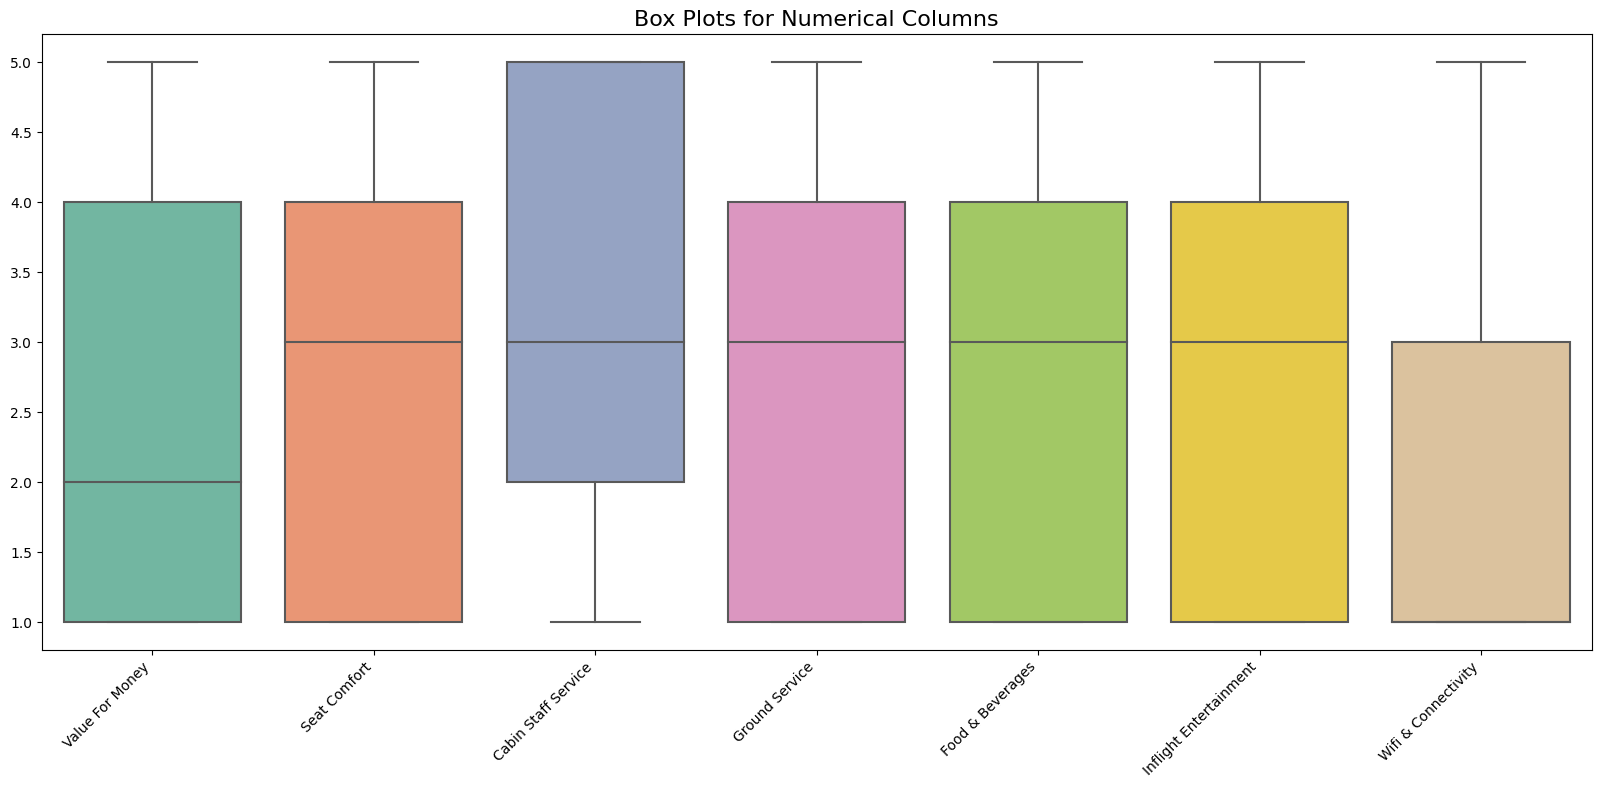

In [20]:
# Select relevant numerical columns
numerical_columns = ['Value For Money', 'Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Food & Beverages', 'Inflight Entertainment', 'Wifi & Connectivity']

# Create a box plot for each numerical column
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Box Plots for Numerical Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

- The distribution for Value for Money appears to be positively skewed since the median is closer to the upper end of the IQR. This suggests that there might be more instances of higher ratings for 'Value For Money' than lower ratings.

### Understand the Distribution of Reviews

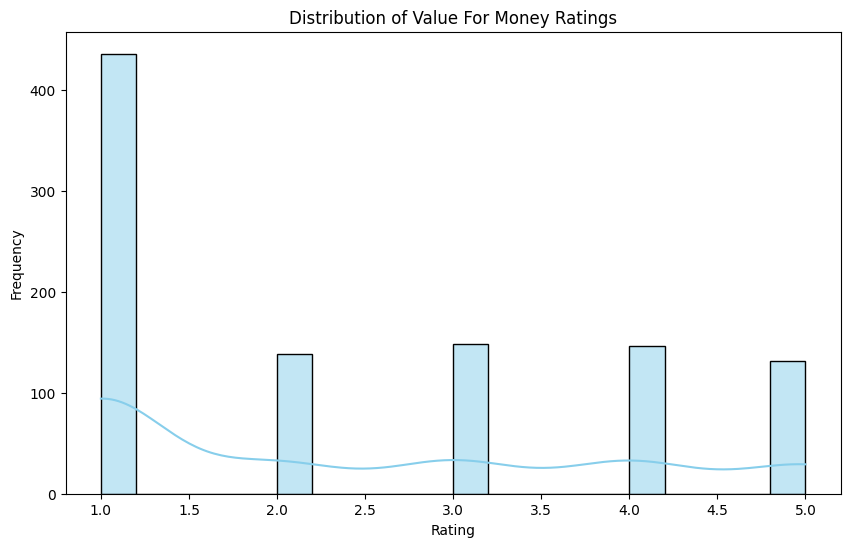

In [21]:
# Check the distribution of the 'Value For Money' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Value For Money'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Value For Money Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Explore Categorical Variables

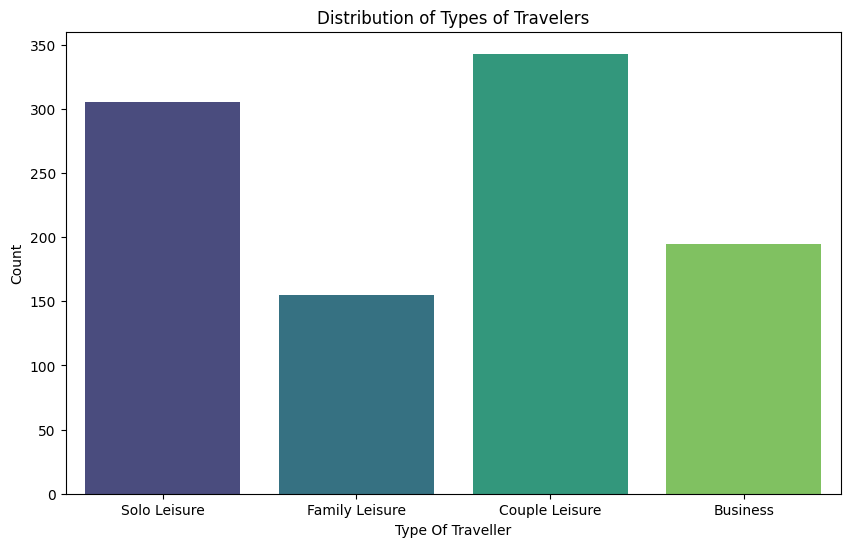

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type Of Traveller', data=df, palette='viridis')
plt.title('Distribution of Types of Travelers')
plt.xlabel('Type Of Traveller')
plt.ylabel('Count')
plt.show()

- a significant number of reviews are associated with customers who are traveling as a couple for leisure purposes. This could indicate that British Airways attracts a notable segment of couples traveling for vacation or other leisure activities.
- The second-highest count for "Solo Leisure" implies that there is a substantial number of reviews from individuals traveling alone for leisure. This information could be valuable for understanding the preferences and experiences of solo travelers.
- The "Business" category with a lower count suggests that there are fewer reviews related to business travelers. This might indicate that British Airways might be more popular among leisure travelers than business travelers, or it could be reflective of the overall distribution of travelers.
- The lowest count for "Family Leisure" implies that there are relatively fewer reviews from families traveling for leisure. This could be due to various factors, such as the airline's marketing focus, the types of routes offered, or the perception of the airline among families.
- Since "Couple Leisure" and "Solo Leisure" travelers dominate, British Airways might consider tailoring some services or marketing efforts to cater specifically to the preferences and needs of these segments.

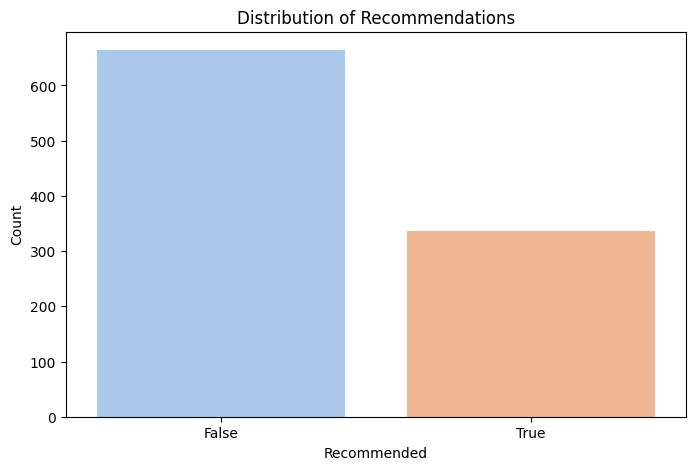

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Recommended', data=df, palette='pastel')
plt.title('Distribution of Recommendations')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

- a larger number of customers did not recommend the airline. In the context of customer feedback, this could be an indication of lower overall satisfaction among the customers who provided reviews. We will investigate this further

### Analyze Text Data (Reviews)

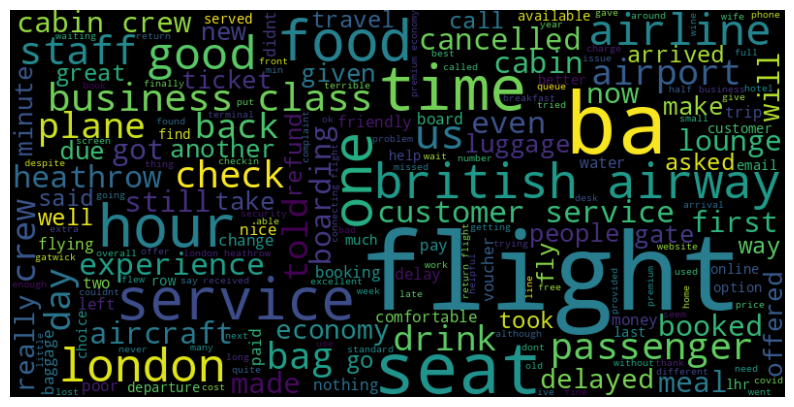

In [24]:
reviews_text = ' '.join(df['reviews'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(reviews_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

- From the wordcloud above, we can see the key of topics in customer review are flight, seat , service, time, business, class, drink and plane. showing that people are actively talking about their experience on the plane and the staff.

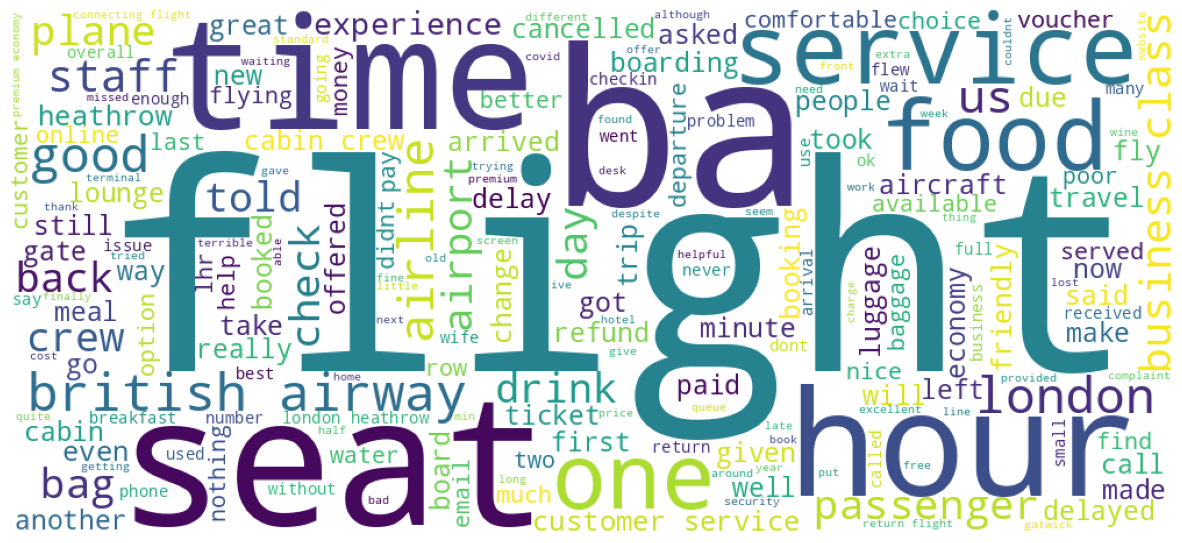

In [25]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Additional Statistics

<ipython-input-26-9eacb5c7438a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


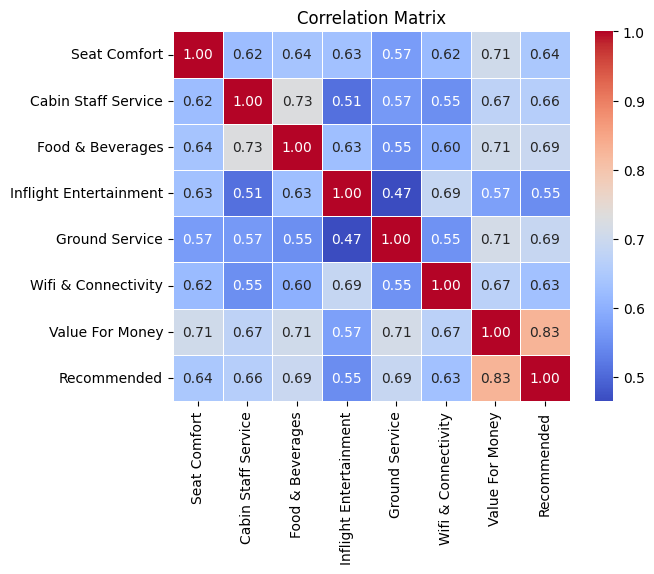

In [26]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Text Preprocessing

### Tokenization

Tokenization is the process of breaking down a text into individual units, usually words or tokens. In the context of natural language processing (NLP), these tokens are the basic building blocks for further analysis.

- Break down the text in the 'reviews' column into individual words or tokens.
- This code creates a new column named 'tokenized_reviews' in your DataFrame (df), where each entry contains a list of tokens corresponding to the words in the original text.
- Suppose you have a review like "The flight experience was amazing!" The tokenization process would convert this into a list of tokens: ['The', 'flight', 'experience', 'was', 'amazing', '!'].

In [27]:
import nltk
from nltk.tokenize import word_tokenize
# Download the 'punkt' resource
nltk.download('punkt')

# Assuming 'reviews' is the column containing the text
df['tokenized_reviews'] = df['reviews'].apply(lambda x: word_tokenize(str(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,tokenized_reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,True,having not flown with ba for a few years i ...,"[having, not, flown, with, ba, for, a, few, ye..."
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,False,dear community i feel compelled to share the...,"[dear, community, i, feel, compelled, to, shar..."
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,True,quick bag drop at first wing but too many p...,"[quick, bag, drop, at, first, wing, but, too, ..."
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False,hours before takeoff we received a mail st...,"[hours, before, takeoff, we, received, a, mail..."
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,False,i recently had a delay on british airways f...,"[i, recently, had, a, delay, on, british, airw..."


### Remove Stop Words

- Stop words are common words (e.g., 'the', 'and', 'is') that often do not contribute much to the analysis.

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['filtered_reviews'] = df['tokenized_reviews'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,tokenized_reviews,filtered_reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,True,having not flown with ba for a few years i ...,"[having, not, flown, with, ba, for, a, few, ye...","[flown, ba, years, read, reviews, preparation,..."
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,False,dear community i feel compelled to share the...,"[dear, community, i, feel, compelled, to, shar...","[dear, community, feel, compelled, share, utte..."
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,True,quick bag drop at first wing but too many p...,"[quick, bag, drop, at, first, wing, but, too, ...","[quick, bag, drop, first, wing, many, passenge..."
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False,hours before takeoff we received a mail st...,"[hours, before, takeoff, we, received, a, mail...","[hours, takeoff, received, mail, stating, cryp..."
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,False,i recently had a delay on british airways f...,"[i, recently, had, a, delay, on, british, airw...","[recently, delay, british, airways, bru, lhr, ..."


### Other Text Preprocessing

- Remove any punctuation marks and perform lemmatization
-  Lemmatization is a text normalization technique that involves reducing words to their base or root form. The base form is called the "lemma." The goal of lemmatization is to group together different inflected forms of a word so that they can be analyzed as a single item.

For example:

The lemma of "running" is "run."
The lemma of "better" is "good."

In [29]:
import string
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['processed_reviews'] = df['filtered_reviews'].apply(lambda tokens: [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha()])
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,tokenized_reviews,filtered_reviews,processed_reviews
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,True,having not flown with ba for a few years i ...,"[having, not, flown, with, ba, for, a, few, ye...","[flown, ba, years, read, reviews, preparation,...","[flown, ba, year, read, review, preparation, n..."
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,False,dear community i feel compelled to share the...,"[dear, community, i, feel, compelled, to, shar...","[dear, community, feel, compelled, share, utte...","[dear, community, feel, compelled, share, utte..."
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,True,quick bag drop at first wing but too many p...,"[quick, bag, drop, at, first, wing, but, too, ...","[quick, bag, drop, first, wing, many, passenge...","[quick, bag, drop, first, wing, many, passenge..."
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False,hours before takeoff we received a mail st...,"[hours, before, takeoff, we, received, a, mail...","[hours, takeoff, received, mail, stating, cryp...","[hour, takeoff, received, mail, stating, crypt..."
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,False,i recently had a delay on british airways f...,"[i, recently, had, a, delay, on, british, airw...","[recently, delay, british, airways, bru, lhr, ...","[recently, delay, british, airway, bru, lhr, d..."


## Topic Modelling

### Create a Document-Term Matrix (DTM)
- Convert the tokenized text data into a document-term matrix. This matrix represents the frequency of words in each document (review).
- Creating a Document-Term Matrix (DTM) involves converting the tokenized text data into a matrix where rows represent documents (reviews) and columns represent unique words in the entire corpus. The values in the matrix typically represent the frequency of each word in the corresponding document.
- corpora.Dictionary creates a mapping between words and their integer IDs. It is used to build a dictionary from the tokenized text data.
- dictionary.doc2bow(doc): This function converts each document (list of words) into a bag-of-words format, where each word is represented by its unique ID and the frequency of that word in the document.

In [30]:
from gensim import corpora

# Assume 'tokenized_text_data' is a list of tokenized reviews
tokenized_text_data = df['processed_reviews'].tolist()

# Create a dictionary from the tokenized data
dictionary = corpora.Dictionary(tokenized_text_data)

# Create the Document-Term Matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_text_data]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(4, 6),
  (14, 1),
  (18, 1),
  (19, 5),
  (22, 1),
  (25, 1),
  (26, 3),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 3),
  (56, 4),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 4),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1)

### TF-IDF Vectorization

- TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique that assigns weights to words in a document based on their frequency in the document and their rarity across the entire dataset.
- models.TfidfModel(doc_term_matrix) creates a TF-IDF model using the bag-of-words representation (doc_term_matrix). It calculates TF-IDF weights for each term in each document.
- tfidf_model[doc_term_matrix]: Applies the TF-IDF model to the bag-of-words representation, resulting in a TF-IDF weighted matrix (tfidf_matrix).
- TF-IDF considers the importance of each word not only within a document but also across the entire corpus. This way, words that are frequent in a specific document but rare in the entire corpus get higher weights, capturing their significance in that document.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models

tfidf_model = models.TfidfModel(doc_term_matrix)
tfidf_matrix = tfidf_model[doc_term_matrix]

### Apply LDA Model

- Train an LDA model on the document-term matrix. Specify the number of topics you want to extract
- num_topics: sets the number of topics you want the model to find
- tfidf_matrix: This is the matrix representing the importance of words in each document using TF-IDF. It's created from your text data.
- id2word=dictionary: helps the model understand the mapping between words and their numerical representations.
- passes: It represents the number of times the model goes through the entire dataset. A higher number might lead to better results but also takes more time.
- then print the top 5 words for each identified topic.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Apply LDA model
num_topics = 5  # You can adjust the number of topics
lda_model_tfidf = models.LdaModel(tfidf_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

# Print top words for each topic
topics_tfidf = lda_model_tfidf.print_topics(num_words=5)
for topic in topics_tfidf:
    print(topic)

# Visualize the LDA model with TF-IDF
vis_data_tfidf = gensimvis.prepare(lda_model_tfidf, tfidf_matrix, dictionary)
pyLDAvis.display(vis_data_tfidf)

(0, '0.003*"seat" + 0.003*"ba" + 0.003*"good" + 0.003*"class" + 0.002*"hour"')
(1, '0.001*"flower" + 0.001*"promise" + 0.001*"denver" + 0.001*"keeping" + 0.001*"period"')
(2, '0.001*"chennai" + 0.001*"ny" + 0.001*"cancun" + 0.001*"diverted" + 0.001*"santorini"')
(3, '0.001*"stockholm" + 0.001*"ticket" + 0.001*"copenhagen" + 0.001*"iberia" + 0.001*"airline"')
(4, '0.001*"unorganized" + 0.001*"wet" + 0.001*"rotterdam" + 0.001*"cdg" + 0.001*"carolina"')


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


- (0, ...) indicates that this is the first topic (topics are zero-indexed).
- 0.003*"seat" + 0.003*"ba" + 0.003*"good" + 0.003*"class" + 0.002*"hour" lists the top words for this topic, along with their associated weights.
- Each number represents the weight (importance) of a word within that topic. - - For example: In topic 0, the word "seat" has a weight of 0.003, "ba" has a weight of 0.003, and so on.
- The higher the weight, the more significant the word is within that topic.
- The presence of words like "seat," "ba," "good," "class," and "hour" suggests that this topic might be related to the quality of seats, service class, and time-related aspects of the airline experience.

### Interpret Topics

- Topic 0: Comfort and Flight Experience
Prevalent Words: seat, ba, good, class, hour
Interpretation: This topic seems to be related to the comfort of seats in different classes and the overall experience during the flight. It may represent customer sentiments regarding seat quality and overall flight duration.

- Topic 1: Ambiguous or Unrelated
Prevalent Words: flower, promise, denver, keeping, period
Interpretation: This topic appears to be less related to airline experiences and more ambiguous. It could be noise or unrelated terms. It might be beneficial to review the preprocessing steps and investigate why these words are present in this topic.

- Topic 2: Destinations and Flights
Prevalent Words: chennai, ny, cancun, diverted, santorini
Interpretation: This topic might be related to specific locations or destinations. It could represent customers' experiences or concerns related to flights to or from these places.

- Topic 3: Ticketing and Airline Experiences
Prevalent Words: stockholm, ticket, copenhagen, iberia, airline
Interpretation: This topic seems to involve aspects related to tickets, airlines, and specific locations. It could represent discussions about ticketing experiences, airlines, or flights to certain cities.

- Topic 4: Organization and Conditions
Prevalent Words: unorganized, wet, rotterdam, cdg, carolina
Interpretation: This topic might be related to the overall organization and conditions, possibly referring to issues like unorganized processes, wet conditions, or specific locations like Rotterdam and Carolina.

## Sentiment Analysis

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # Check if the input is a list, and convert it to a string
    if isinstance(text, list):
        text = ' '.join(text)

    sentiment_score = sid.polarity_scores(text)

    # Classify the sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['processed_reviews'].apply(get_sentiment)
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,tokenized_reviews,filtered_reviews,processed_reviews,sentiment
0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,2023-11-01,2.0,3.0,3.0,1.0,4.0,1.0,3,True,having not flown with ba for a few years i ...,"[having, not, flown, with, ba, for, a, few, ye...","[flown, ba, years, read, reviews, preparation,...","[flown, ba, year, read, review, preparation, n...",negative
1,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,2023-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1,False,dear community i feel compelled to share the...,"[dear, community, i, feel, compelled, to, shar...","[dear, community, feel, compelled, share, utte...","[dear, community, feel, compelled, share, utte...",negative
2,A380,Couple Leisure,First Class,London to Miami,2023-11-01,5.0,5.0,5.0,5.0,4.0,2.0,4,True,quick bag drop at first wing but too many p...,"[quick, bag, drop, at, first, wing, but, too, ...","[quick, bag, drop, first, wing, many, passenge...","[quick, bag, drop, first, wing, many, passenge...",positive
3,NaN,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,NaN,NaN,1.0,NaN,1,False,hours before takeoff we received a mail st...,"[hours, before, takeoff, we, received, a, mail...","[hours, takeoff, received, mail, stating, cryp...","[hour, takeoff, received, mail, stating, crypt...",negative
4,A320,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,1.0,2.0,2,False,i recently had a delay on british airways f...,"[i, recently, had, a, delay, on, british, airw...","[recently, delay, british, airways, bru, lhr, ...","[recently, delay, british, airway, bru, lhr, d...",negative


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


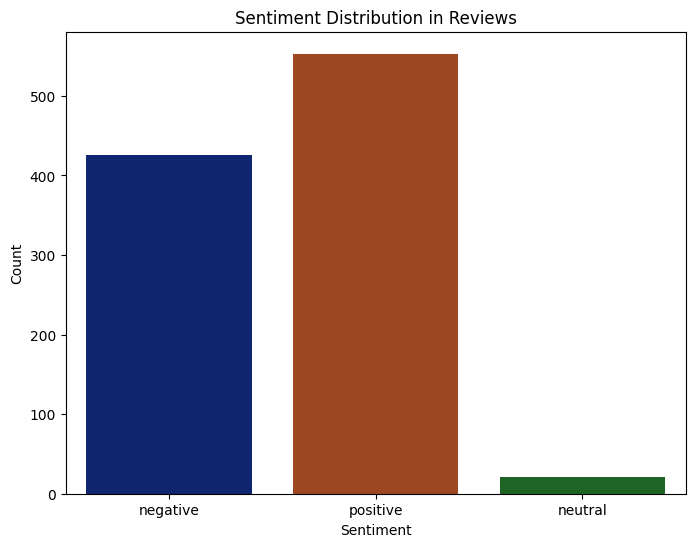

In [46]:
# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='dark')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [47]:
df.to_csv('sentiment_analysis.csv', index=False)  # Update with your desired file path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- the majority of reviews have a positive sentiment.


### Explore Sentiment Distribution for 'Type Of Traveller'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


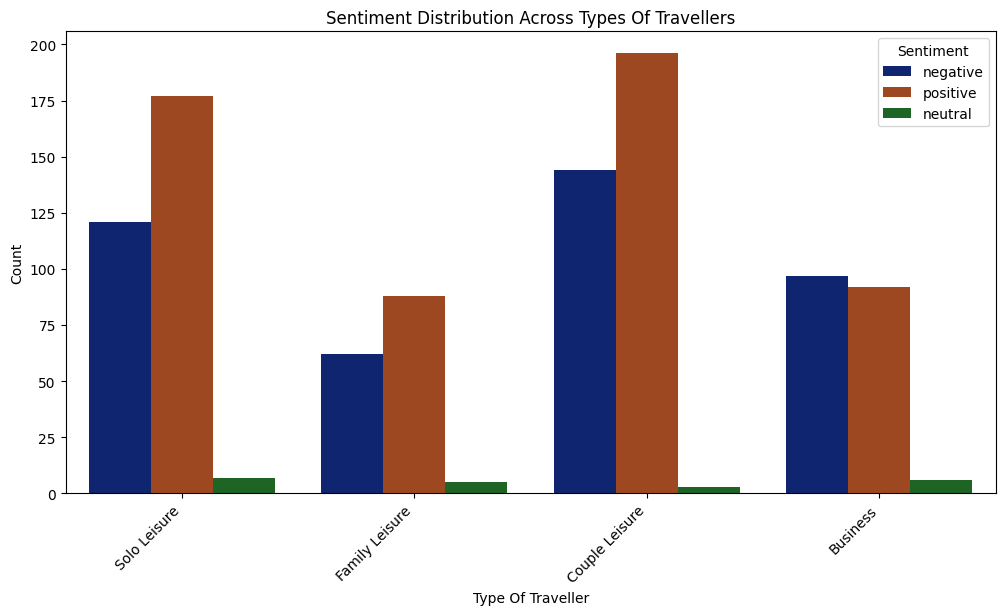

In [41]:
# Assuming 'Type Of Traveller' is one of your columns
# Replace 'Type Of Traveller' with the actual column name if different
plt.figure(figsize=(12, 6))
sns.countplot(x='Type Of Traveller', hue='sentiment', data=df, palette='dark')
plt.title('Sentiment Distribution Across Types Of Travellers')
plt.xlabel('Type Of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.legend(title='Sentiment')
plt.show()

### Explore Sentiment Distribution for 'Seat Type'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Economy Class'),
  Text(1, 0, 'First Class'),
  Text(2, 0, 'Business Class'),
  Text(3, 0, 'Premium Economy')])

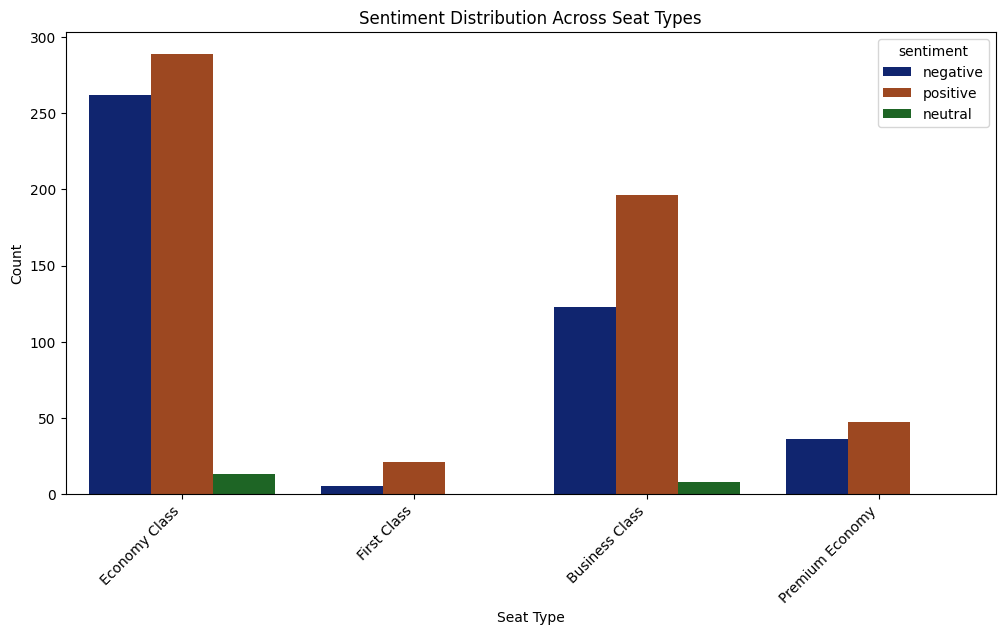

In [45]:
# Assuming 'Seat Type' is one of your columns
# Replace 'Seat Type' with the actual column name if different
plt.figure(figsize=(12, 6))
sns.countplot(x='Seat Type', hue='sentiment', data=df, palette='dark')
plt.title('Sentiment Distribution Across Seat Types')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better